In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as la

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
sess.run(tf.global_variables_initializer())
y = tf.matmul(x,W) + b
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9186


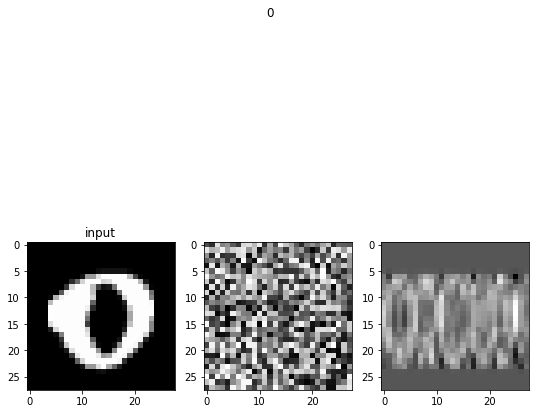

In [9]:
imid = 0
imshape = (28,28)
imdata = np.reshape(batch[0][imid,:], imshape)
imlabel = np.argmax(batch[1][imid,:])
fig = plt.figure(figsize=(9,9)) 
#fig.suptitle(str(imlabel))

ax = plt.subplot(1,4,1)
ax.set_title('input')
plt.imshow(imdata, cmap='gray')
ax = plt.subplot(1,4,2)
ax.set_title('target')
rand_dest = np.random.rand(imshape[0], imshape[1])
plt.imshow(rand_dest, cmap='gray')
ax = plt.subplot(1,4,3)
ax.set_title('full rotation')
R = la.orthogonal_procrustes(imdata, rand_dest)
normR = la.norm(R[0],'fro')
plt.imshow(np.matmul(imdata, R[0]), cmap='gray')

#plt.imshow(np.matmul(imdata, np.eye(imshape[0]) + R[0]/(normR)), cmap=plt.cm.BuPu_r)

plt.show()

In [5]:
R = la.orthogonal_procrustes(imdata.flatten(), rand_dest.flatten())


ValueError: expected ndim to be 2, but observed 1